<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/tests/labtest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1

Created $750$ samples with $2$ features using the make_blobs function of sklearn. Used the absolute and minimum value function to enforce the contraints of positivity and maximum value of $24$.

In [79]:
import numpy as np
from sklearn.datasets import make_blobs
np.random.seed(6)
n_samples = 750
n_features = 2
x, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, random_state=6)
x = np.abs(x)
x = np.minimum(x, 24)

##Q2

Displaying the shape and size of the dataset and sample rows for validation.

In [80]:
print("The shape of the dataset is ",x.shape)
print("The size of the dataset is ",len(x))
print("Sample rows...\n", x[:9])

The shape of the dataset is  (750, 2)
The size of the dataset is  750
Sample rows...
 [[9.02969829 4.72482562]
 [8.18167079 2.9164658 ]
 [7.9374881  6.00096736]
 [8.28348842 4.11856092]
 [9.12657405 3.19933501]
 [7.76588701 3.29923074]
 [7.92336956 4.33157972]
 [6.81289801 3.32882057]
 [8.53016092 3.61190562]]


##Q3

Custom implementation of K-Means clustering algorithm.

In [81]:
import math
import pandas as pd

In [82]:
class Cluster(object):
  def __init__(shila, x:pd.DataFrame, k:int=3, seed:bool=False):
    shila.k = k
    shila.x = x
    shila.exit = False
    shila.clusters = {}
    if seed:
      np.random.seed(6)
    centers = np.array(shila.x.sample(n=shila.k))
    c = -1
    for i in centers:
      c +=1
      center = i
      points = []
      cluster ={'center' : center, 'points' : [] }
      shila.clusters[c] = cluster
  @staticmethod
  def euclid(x1:int, x2:int):
    return math.dist(x1,x2)
  def assign_clusters(shila):
    for i in range(shila.x.shape[0]):
      dist = []
      curr_x = np.array(shila.x.iloc[i])
      for i in range(shila.k):
        dis = Cluster.euclid(curr_x,shila.clusters[i]['center'])
        dist.append(dis)
      curr_cluster = np.argmin(dist)
      shila.clusters[curr_cluster]['points'].append(curr_x)
    return shila.clusters
  def update_clusters(shila):
    for i in range(shila.k):
      points = np.array(shila.clusters[i]['points'])
      if points.shape[0] > 0:
        new_center = points.mean(axis=0)
        shila.clusters[i]['center'] = new_center
        shila.clusters[i]['points'] = []
    return shila.clusters
  def fit(shila):
    i = 0
    while(i<20):
      Cluster.assign_clusters(shila)
      Cluster.update_clusters(shila)
      i += 1
  def pred_cluster(shila):
    pred = []
    for i in range(shila.x.shape[0]):
      dist = []
      for j in range(shila.k):
        dist.append(Cluster.euclid(np.array(shila.x.iloc[i]),shila.clusters[j]['center']))
      pred.append(np.argmin(dist))
    return pred

In [83]:
import matplotlib.pyplot as pt
def visualize(x:pd.DataFrame, pred):
  fig, ax = pt.subplots(3,3,figsize=(20,18))
  k = 2
  for i in range(0,3):
    for j in range(0,3):
      ax[i][j].scatter(x[0], x[1], c=pred[k-2])
      ax[i][j].set_xlabel('Column 1')
      ax[i][j].set_ylabel('Column 2')
      ax[i][j].set_title("Number of clusters = "+str(k))
      k += 1

In [84]:
preds = []
for i in range(2,11):
  ob = Cluster(pd.DataFrame(x),i)
  ob.fit()
  preds.append(ob.pred_cluster())

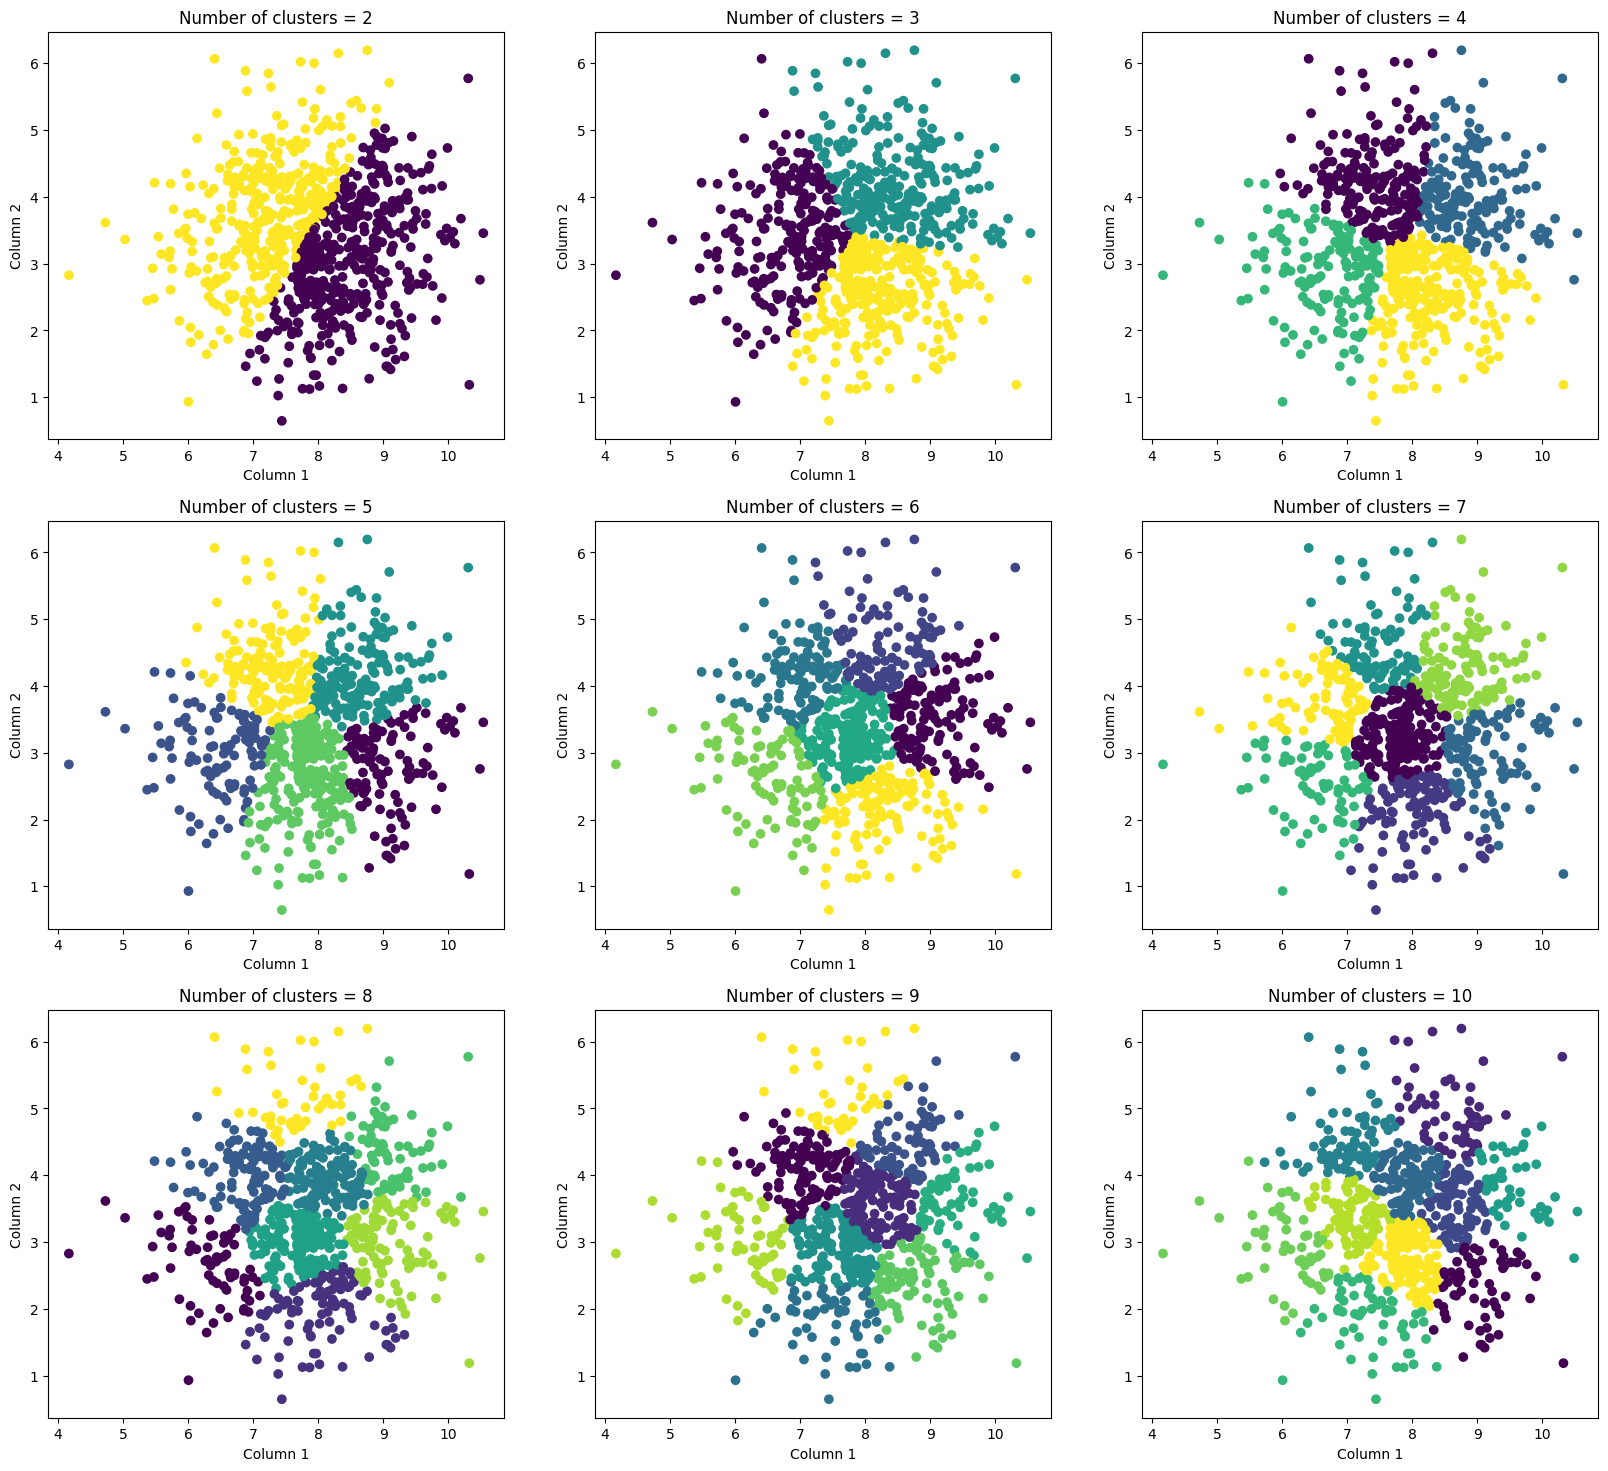

In [85]:
visualize(pd.DataFrame(x), preds)

##Q4

Printing the number of samples in each cluster for all the $8$ cases.

In [86]:
from collections import Counter

In [87]:
for i in range(2,11):
  print("When number of clusters = ",i)
  for j,k in zip(Counter(preds[i-2]).keys(), Counter(preds[i-2]).values()):
    print("Number of samples in cluster ",j,": ",k)
  print()

When number of clusters =  2
Number of samples in cluster  0 :  389
Number of samples in cluster  1 :  361

When number of clusters =  3
Number of samples in cluster  1 :  259
Number of samples in cluster  2 :  257
Number of samples in cluster  0 :  234

When number of clusters =  4
Number of samples in cluster  1 :  167
Number of samples in cluster  3 :  230
Number of samples in cluster  0 :  198
Number of samples in cluster  2 :  155

When number of clusters =  5
Number of samples in cluster  2 :  167
Number of samples in cluster  3 :  210
Number of samples in cluster  4 :  151
Number of samples in cluster  0 :  109
Number of samples in cluster  1 :  113

When number of clusters =  6
Number of samples in cluster  1 :  110
Number of samples in cluster  3 :  165
Number of samples in cluster  0 :  135
Number of samples in cluster  4 :  98
Number of samples in cluster  2 :  118
Number of samples in cluster  5 :  124

When number of clusters =  7
Number of samples in cluster  5 :  125
Num

##Q5

The within cluster sum of squares distance for clusters created. Printed and Plotted.

The within cluster distance with  2  clusters is  932.0569120973712
The within cluster distance with  3  clusters is  642.9382234095514
The within cluster distance with  4  clusters is  475.90876826776145
The within cluster distance with  5  clusters is  403.4297772045097
The within cluster distance with  6  clusters is  336.79748487347933
The within cluster distance with  7  clusters is  298.9610726338982
The within cluster distance with  8  clusters is  269.4601557996025
The within cluster distance with  9  clusters is  242.64972336173815
The within cluster distance with  10  clusters is  211.11785934895755


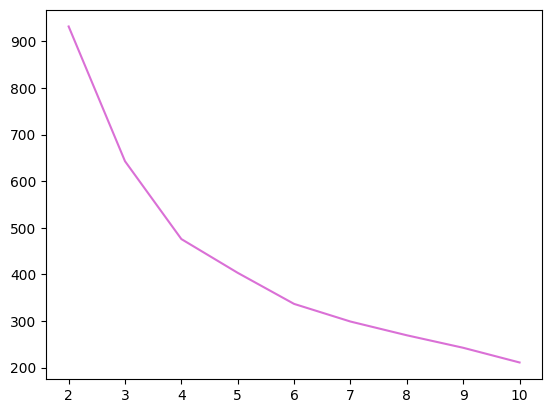

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inr = []
sil_k = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(x)
  inr.append(kmeans.inertia_)
  sil_k.append(silhouette_score(x, kmeans.labels_))
  print("The within cluster distance with ",i," clusters is ", inr[i-2])
pt.plot(range(2,11), inr, color='orchid');

##Q6

Silhouette scores by KMeans.

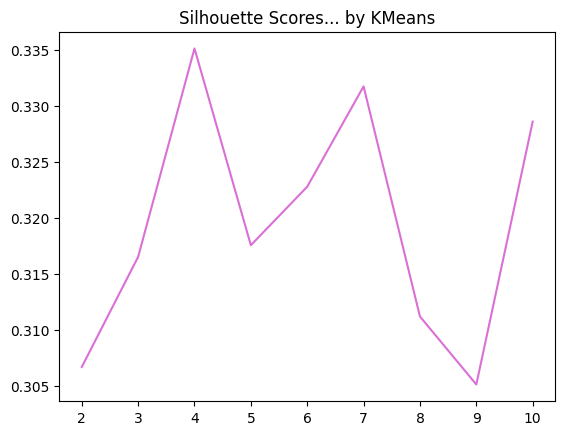

In [89]:
pt.plot(range(2,11), sil_k, color='orchid')
pt.title("Silhouette Scores... by KMeans");

##Q7

We perform hierarchical clustering using Birch.

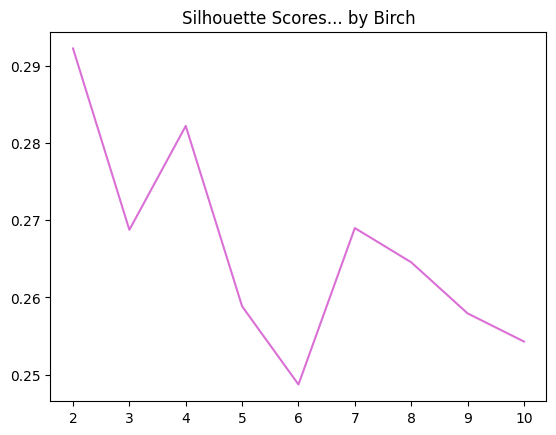

In [90]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
sil = []
for i in range(2,11):
  birch = Birch(n_clusters = i)
  birch.fit(x)
  labels = birch.labels_
  sil.append(silhouette_score(x, labels))
pt.plot(range(2,11), sil, color='orchid')
pt.title("Silhouette Scores... by Birch");

##Q8

Linkage measures

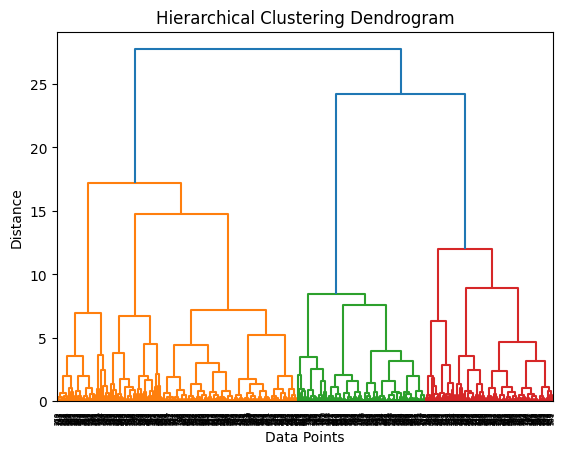

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(x, method='ward')
dendrogram(linkage_matrix)
pt.title('Hierarchical Clustering Dendrogram')
pt.xlabel('Data Points')
pt.ylabel('Distance')
pt.show();

#Q9

Visualizing different linkages using dendograms.

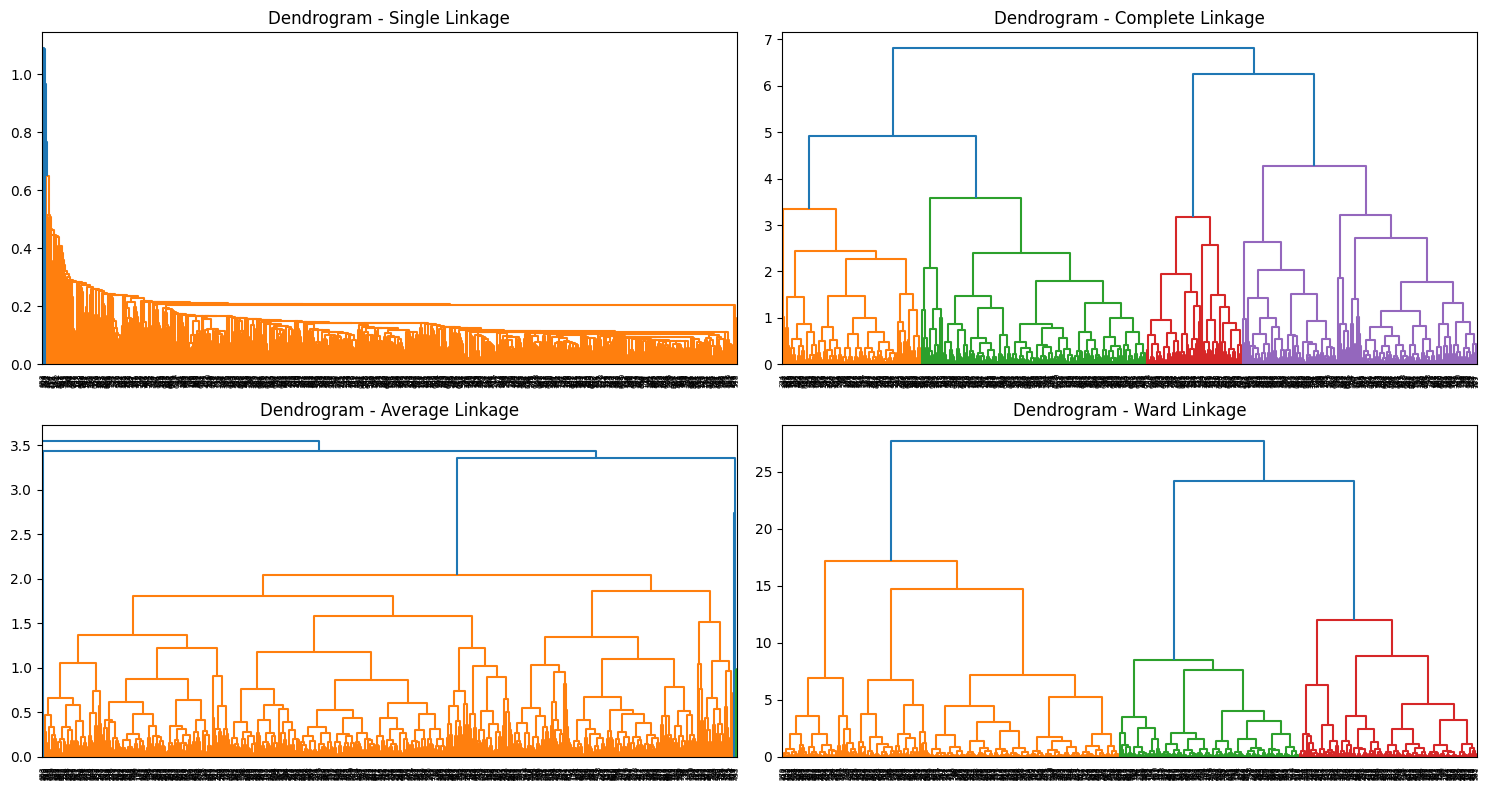

In [92]:
import seaborn as sns
x = pd.DataFrame(x)
linkage_methods = ['single', 'complete', 'average', 'ward']
pt.figure(figsize=(15, 8))
for i, method in enumerate(linkage_methods, 1):
    pt.subplot(2, 2, i)
    Z = linkage(x, method)
    dendrogram(Z, labels=x.index)
    pt.title(f'Dendrogram - {method.capitalize()} Linkage')
pt.tight_layout()
pt.show();

##Q10

Comparing quality between KMeans and Hierarchical.

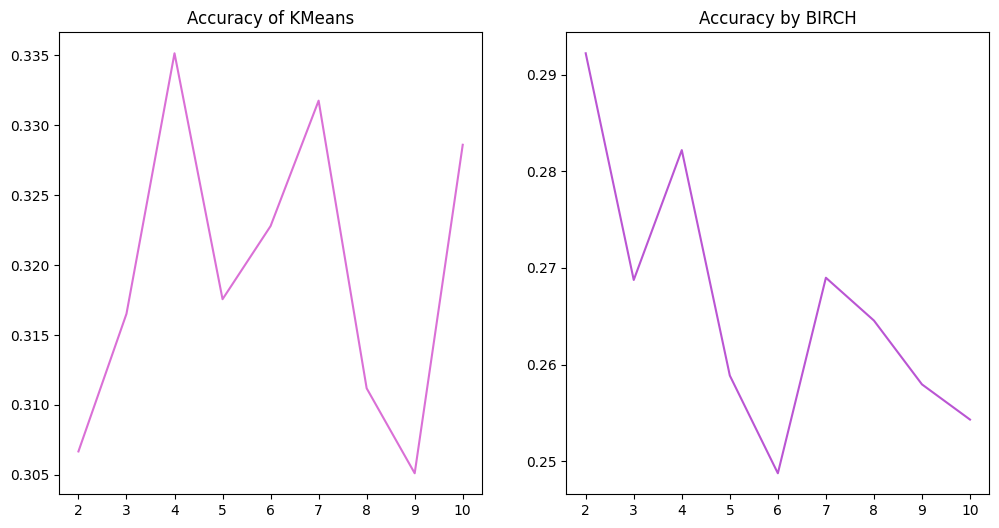

In [93]:
fig, ax = pt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(2,11), sil_k, color='orchid')
ax[1].plot(range(2,11), sil, color='mediumorchid')
ax[0].set_title("Accuracy of KMeans")
ax[1].set_title("Accuracy by BIRCH");

##Q11

Custom implementation of the neural network.
Done one for self and one for given.
Accuracy is evaluated for both to show error rates.
Self performs better.

In [94]:
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z, 0)

    def fit(self, x, y):
        n_features = x.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for epoch in range(self.epochs):
            for i in range(len(x)):
                z = np.dot(x, self.weights) + self.bias
                y_pred = self.activation(z)
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * x[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
        return self.weights, self.bias

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation(z)

In [95]:
percep_and = Perceptron(0.001, 100)
percep_or = Perceptron(0.001, 100)
percep_xor = Perceptron(0.001, 100)
from sklearn.metrics import accuracy_score

x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
percep_and.fit(x_and, y_and)

x_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
percep_or.fit(x_or, y_or)

x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
percep_xor.fit(x_xor, y_xor);

In [96]:
pred_and_my = percep_and.predict([[0,0],[0,1],[1,0],[1,1]])
pred_or_my = percep_or.predict([[0,0],[0,1],[1,0],[1,1]])
pred_xor_my = percep_xor.predict([[0,0],[0,1],[1,0],[1,1]])

In [97]:
print("Accuracy for AND operation: ",accuracy_score(pred_and_my, [0,0,0,1])*100,'%')
print("Accuracy for OR operation: ",accuracy_score(pred_and_my, [0,1,1,1])*100,'%')
print("Accuracy for XOR operation: ",accuracy_score(pred_and_my, [1,0,0,1])*100,'%')

Accuracy for AND operation:  100.0 %
Accuracy for OR operation:  50.0 %
Accuracy for XOR operation:  75.0 %


Implementing with the given weights and bias.

In [98]:
class Perceptron_w:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z, 0)

    def fit(self, x, y):
        n_features = x.shape[1]
        self.weights = np.array([1.5,0.5])
        self.bias = -0.5
        for epoch in range(self.epochs):
            for i in range(len(x)):
                z = np.dot(x, self.weights) + self.bias
                y_pred = self.activation(z)
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * x[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
        return self.weights, self.bias

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation(z)

In [99]:
percep_and_w = Perceptron_w(0.001, 100)
percep_or_w = Perceptron_w(0.001, 100)
percep_xor_w = Perceptron_w(0.001, 100)

x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
percep_and_w.fit(x_and, y_and)

x_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
percep_or_w.fit(x_or, y_or)

x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
percep_xor_w.fit(x_xor, y_xor);

In [100]:
pred_and = percep_and_w.predict([[0,0],[0,1],[1,0],[1,1]])
pred_or = percep_or_w.predict([[0,0],[0,1],[1,0],[1,1]])
pred_xor = percep_xor_w.predict([[0,0],[0,1],[1,0],[1,1]])

In [101]:
print("Accuracy for AND operation: ",accuracy_score(pred_and, [0,0,0,1])*100,'%')
print("Accuracy for OR operation: ",accuracy_score(pred_and, [0,1,1,1])*100,'%')
print("Accuracy for XOR operation: ",accuracy_score(pred_and, [1,0,0,1])*100,'%')

Accuracy for AND operation:  75.0 %
Accuracy for OR operation:  75.0 %
Accuracy for XOR operation:  50.0 %
